In [ ]:
from datasets import load_dataset
import tiktoken
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm
from src.result_parsers import countdown_trajectories

# Specify the dataset name and the message columns you want to analyze
dataset_name = "MelinaLaimon/stream-of-search"  # Replace with the actual dataset name
message_columns = [
    "messages_optimal",
    "messages_sos_react",
    "messages_sos",
    "messages_deepseek_r1_distill_llama_70b",
    "messages_deepseek",
]

# Specify the encoding to use with tiktoken (usually 'cl100k_base' for OpenAI models)
encoding_name = "cl100k_base"

# Load the dataset
try:
    dataset = load_dataset(dataset_name, split="train[:50%]")
    if "train" in dataset:
        dataset = dataset["train"]  # Assuming your data is in the 'train' split
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Load the tiktoken encoding
try:
    encoding = tiktoken.get_encoding(encoding_name)
except Exception as e:
    print(f"Error loading tiktoken encoding '{encoding_name}': {e}")
    exit()

def count_tokens(text, encoding):
    if isinstance(text, str):
        return len(encoding.encode(text))
    return 0

def process_example(example, column_name, encoding):
    token_lengths = []
    if column_name in example and isinstance(example[column_name], list):
        for message in example[column_name]:
            if message["role"] == "assistant" and "content" in message:
                content = message["content"]
                token_lengths.append(count_tokens(content, encoding))
    return column_name, token_lengths

def process_column_wrapper(args):
    return process_example(*args)

/Users/melinajingtinglaimon/Documents/UCL-ML-Coursework/COMP0258/stream-of-search/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
from src.result_parsers.countdown_trajectories import evaluate_countdown_trajectory

In [ ]:
evaluate_countdown_trajectory

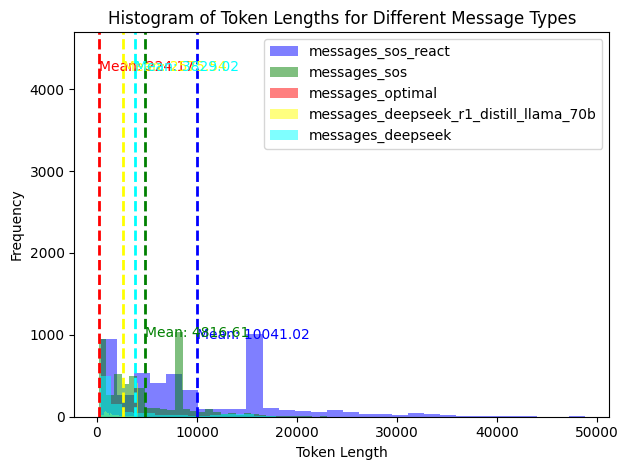

,message_type,mean,median,p75,max
0,messages_sos_react,10041.0202,7903.0,15994.0,48774
1,messages_sos,4816.6064,3771.0,7876.0,23030
2,messages_optimal,224.1678,224.0,224.0,246
3,messages_deepseek_r1_distill_llama_70b,2575.5430,2373.5,4097.0,4128
4,messages_deepseek,3829.0210,1429.5,4776.5,33281


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tiktoken

# # Sample input (replace with actual data)
# result = {"messages_sos_react": {"token_lengths": []}, "messages_sos": {"token_lengths": []}, "messages_optimal": {"token_lengths": []}, "messages_deepseek_r1_distill_llama_70b": {"token_lengths": []}, "messages_deepseek": {"token_lengths": []}}

# # Assuming 'sos' is defined elsewhere in your code
# for message_type in result:
#     for entry in tqdm(dataset):
#         if  entry[message_type] != None:
#             search_path = entry[message_type][1]["content"]  # Replace 'sos' with actual variable
#             enc = tiktoken.get_encoding("cl100k_base")
#             tokens = enc.encode(search_path)
#             result[message_type]["token_lengths"].append(len(tokens))

# # Create a single figure for the histograms
# plt.figure(figsize=(10, 6))

# Colors for the histograms
colors = ['blue', 'green', 'red', 'yellow', 'cyan']

distribution_table = []

# Plot the histograms
for i, message_type in enumerate(result):
    token_lengths = result[message_type]["token_lengths"]
    mean_token_length = np.mean(token_lengths)
    plt.hist(token_lengths, bins=30, alpha=0.5, label=message_type, color=colors[i])

    # Annotate the mean with a vertical line
    plt.axvline(mean_token_length, color=colors[i], linestyle='dashed', linewidth=2)
    plt.text(mean_token_length + 1, plt.ylim()[1] * 0.9, f'Mean: {mean_token_length:.2f}', color=colors[i])
    distribution_table.append({
        "message_type": message_type,
        "mean":np.mean(token_lengths),
        "median":np.median(token_lengths),
        "p75":np.percentile(token_lengths,75),
        "max":np.max(token_lengths),
    })
    

# Label the axes and the title
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Histogram of Token Lengths for Different Message Types')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

distribution_table = pd.DataFrame(distribution_table)
distribution_table